# Plots y visualización de los datos

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mainpath = "F:/BD/GitHub/mlearningcourse/datasets/"
file = "customer-churn-model/Customer Churn Model.txt"
fullpath =os.path.join(mainpath,file)

In [4]:
data = pd.read_csv(fullpath)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
%matplotlib inline

In [6]:
#savefig('path donde guardar la imagen') #cualquier formato

# Scatter plot

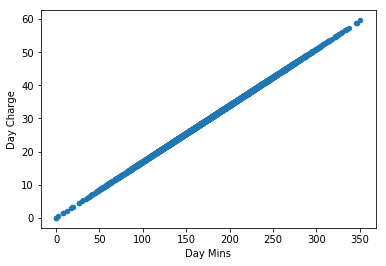

In [7]:
#x = vertical, y = horizontal
data.plot(kind = 'scatter', x = 'Day Mins', y = 'Day Charge')

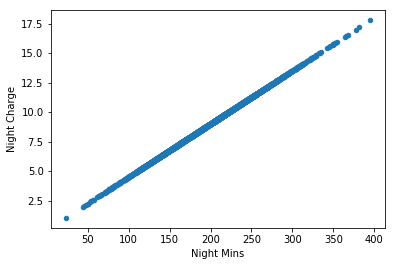

In [8]:
#x = vertical, y = horizontal
data.plot(kind = 'scatter', x = 'Night Mins', y = 'Night Charge')

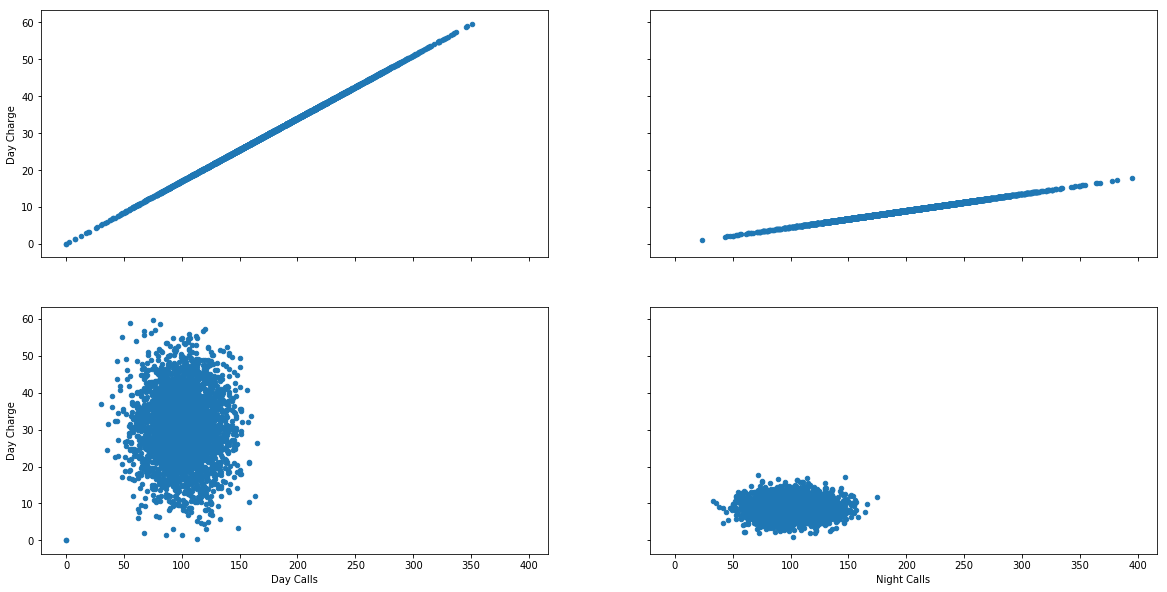

In [9]:
#To create 4 diagrams
figure, axs = plt.subplots(2,2,sharey= True, sharex = True,figsize=(20, 10))
#Crear Subplots
data.plot(kind = 'scatter', x = 'Day Mins', y = 'Day Charge', ax = axs[0][0]) #Primer cuadro (esquina superior izquierda)
data.plot(kind = 'scatter', x = 'Night Mins', y = 'Night Charge', ax = axs[0][1]) #Segundo cuadro (esquina superior derecha)
data.plot(kind = 'scatter', x = 'Day Calls', y = 'Day Charge', ax = axs[1][0]) #Tercer cuadro (esquina inferior izquierda)
data.plot(kind = 'scatter', x = 'Night Calls', y = 'Night Charge', ax = axs[1][1]) #Tercer cuadro (esquina inferior derecha)

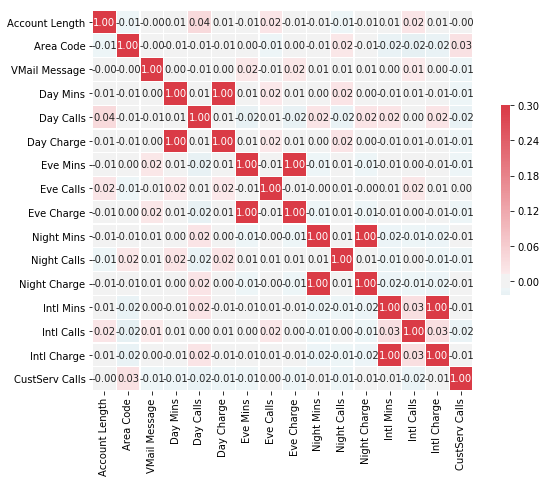

In [10]:
import seaborn as sns

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ig, ax = plt.subplots(figsize=(10,7))

corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            annot = True, cmap = cmap, center=0, vmax=.3, square=True, 
            linewidths=.2, cbar_kws={"shrink": .5}, linecolor = 'white',
            fmt='.2f')

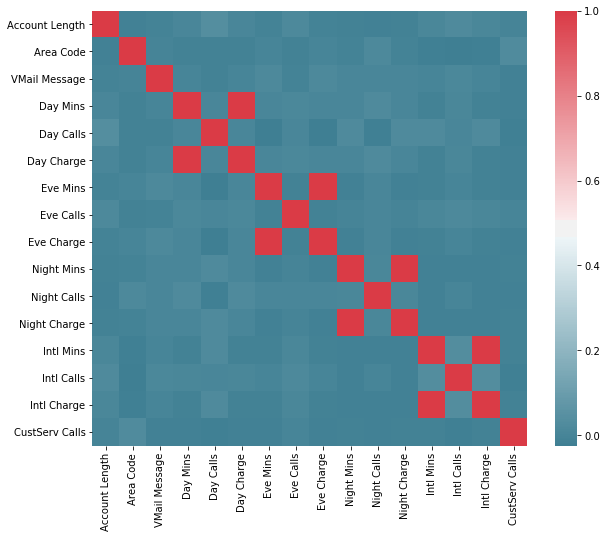

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [12]:
# rs = np.random.RandomState(0)
# df = pd.DataFrame(rs.rand(10, 10))
# corr = data.corr()
# corr.style.background_gradient().set_precision(1)

# Histograma de frecuencias

Text(0.5, 1.0, 'Histograma de llamadas al día')

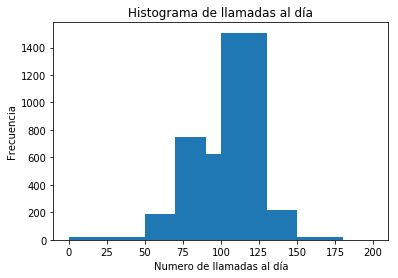

In [13]:
#Bins = Divisiones
plt.hist(data['Day Calls'], bins = [0,50,70,90,100, 130, 150, 180, 200]) #Indicar saltos por barra
plt.xlabel ('Numero de llamadas al día') #Agregar etiquetas
plt.ylabel ('Frecuencia') #Agregar etiquetas
plt.title ('Histograma de llamadas al día') #Título

Text(0.5, 1.0, 'Histograma de llamadas al día')

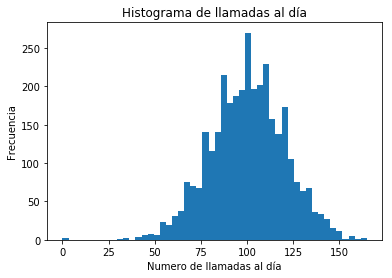

In [14]:
#Bins = Divisiones
plt.hist(data['Day Calls'], bins = 50)
plt.xlabel ('Numero de llamadas al día') #Agregar etiquetas
plt.ylabel ('Frecuencia') #Agregar etiquetas
plt.title ('Histograma de llamadas al día') #Título

#### Regla de Sturges (Cuando se pinta un histograma de frecuencias, ¿cuantas divisiones se deben eleborar en el histograma?


In [15]:
data.shape

(3333, 21)

Text(0.5, 1.0, 'Histograma de llamadas al día')

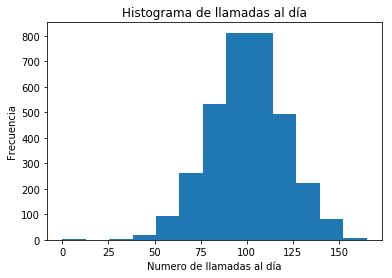

In [19]:
#Bins = Divisiones
k = int ( np.ceil(1+np.log2(3333))) #Regla de Sturges (Fórmula, el 3333 se refiere al número de registos)
plt.hist(data['Day Calls'], bins =k )
plt.xlabel ('Numero de llamadas al día') #Agregar etiquetas
plt.ylabel ('Frecuencia') #Agregar etiquetas
plt.title ('Histograma de llamadas al día') #Título

# Boxplot, diagrama de caja y bigotes

* Las bolitas quedan fuera de lugar

Text(0.5, 1.0, 'BoxPlot de las llamadas del día')

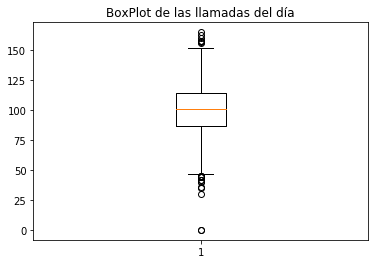

In [20]:
from matplotlib.pyplot import subplots, show
plt.boxplot(data['Day Calls'])
plt.ylab = 'Frecuencia' #Agregar etiquetas
plt.title ('BoxPlot de las llamadas del día') #Título

In [18]:
# Primer bigote (arriba)
data['Day Calls'].quantile(0.75)+1.5*IQR

154.5

In [17]:
# Primer bigote (abajo)
data['Day Calls'].quantile(0.25)-1.5*IQR


46.5

In [16]:
#Rango intercuartilico
IQR = data['Day Calls'].quantile(0.75)-data['Day Calls'].quantile(0.25)
IQR

27.0